# 1-Imports
ابتدا ایمپورت های مورد نیاز را انجام میدهیم و دیتاست را لود میکنیم

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/breast cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<font size=4> <div dir=rtl>
همانطور که مشاهده میگردد تمامی ستون ها عددی هستند بجز ستون تشخیص که
آنرا باید با لیبل انکودینگ انکود کنیم همچنین ستون 32 که NAN  میباشد را باید حذف کنیم زیرا اشتباها ایجاد شده است.

# 2-Lable Encoding

In [7]:
from sklearn import preprocessing

In [8]:
le = preprocessing.LabelEncoder()
le.fit(df['diagnosis'])
df['diagnosis'] = le.transform(df['diagnosis'])

# 3-Defining X, y

In [9]:
X = df[df.columns[2:-1]]
y = df['diagnosis']

In [10]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

# 4-Data Analysis

<font size=4> <div dir=rtl>
حالا با استفاده از ابزار دیتاانالیز مانند کوریلیشن نسبت بین ویژگی هارو مشخص میکنیم و معین میکنیم که هر ویژگی چه رفتاری را دارد و چه ارتباطی با سایر ویژگی ها دارد

## 4-1-matrix correlation
<font size=4> <div dir=rtl>

برای انتخاب ویژگی های مفید از Heatmap model استفاده میکنیم

<Axes: >

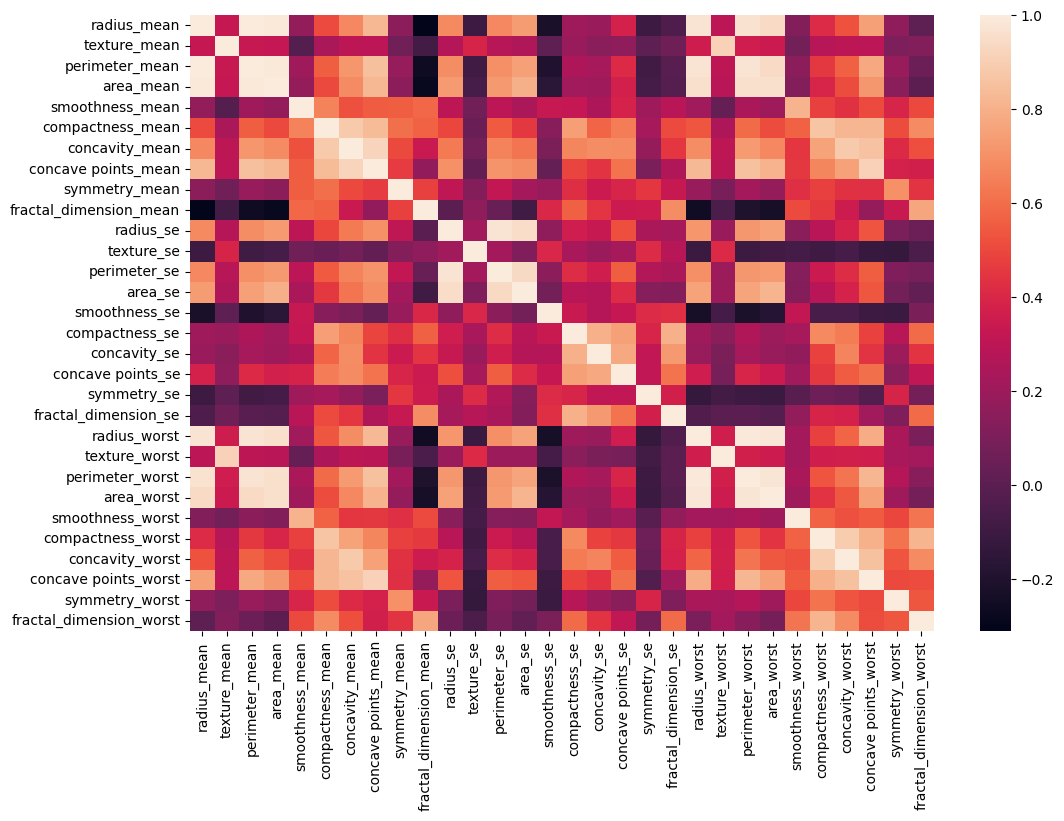

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr())

In [13]:
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

<Axes: >

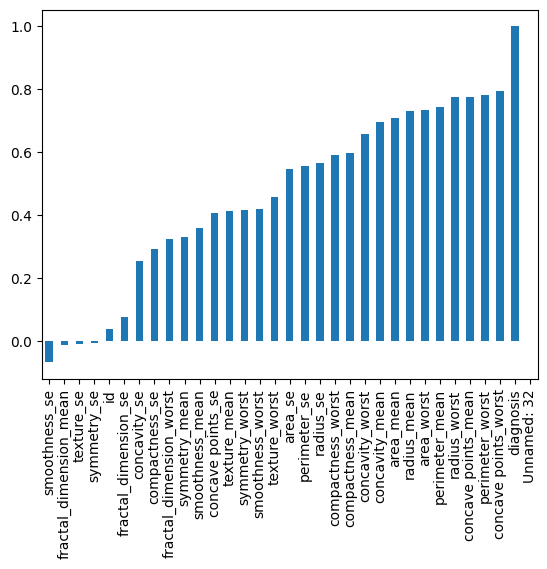

In [14]:
df.corr()['diagnosis'].sort_values().plot(kind='bar')

# 5-Train/Test data and Normalizaion


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=32)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 6-Creating the Model
<font size=4> <div dir=rtl>
چند نکته در مورد مدل:

+ برای بهترین عمل، داشتن واحدهای لایه های ورودی تقریباً برابر با ستون ها یا شکل داده های آموزشی را در نظر بگیرید. در مورد ما 30 است.
+ برای مسائل طبقه بندی، مثل همیشه از تابع سیگموئید در آخرین لایه استفاده می کنیم.

<font size=4> <div dir=rtl>

این مدل دارای 2 لایه مخفی می باشد. لایه متراکم یک لایه کاملا متصل است، به این معنی که هر واحد در این لایه به هر واحد در لایه قبلی متصل است. لایه اول از 30 واحد و یک تابع فعال سازی ReLU تشکیل شده است. لایه متراکم دوم از 15 واحد و دومین تابع فعال سازی ReLU تشکیل شده است. دلیل استفاده دوبار از تابع فعال سازی ReLU، وارد کردن غیر خطی بودن به شبکه عصبی است. لایه خروجی شامل 1 واحد و یک تابع فعال‌سازی سیگموئید برای حل مسائل طبقه‌بندی باینری است، که در آن خروجی باید یک امتیاز احتمال بین 0 و 1 باشد. (بهینه‌سازی 'adam' الگوریتم برای به روز رسانی وزن ها در شبکه عصبی در مرحله آموزش استفاده می شود.)

<font size=4> <div dir=rtl>
فرمول استفاده از بهینه ساز ADAM:
</div>
\begin{equation}
m_t=\beta_1 m_{t-1}+\left(1-\beta_1\right)\left[\frac{\delta L}{\delta w_t}\right] v_t=\beta_2 v_{t-1}+\left(1-\beta_2\right)\left[\frac{\delta L}{\delta w_t}\right]^2
\end{equation}

## 6-1-First Model
<font size=4> <div dir=rtl>
برای شروع با مقدار دیفالت Learning Rate = 0.001  و همچنین epochs = 600 شروع میکنیم و نمودار های لازم را ترسیم کرده و بعد از بهینه سازی های اولیه و تعیین مدل با تغییر هایپرپارامتر مدل را بهینه میکنیم.

In [ ]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam') #first model with learning rate default = 0.001

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test))

<Axes: >

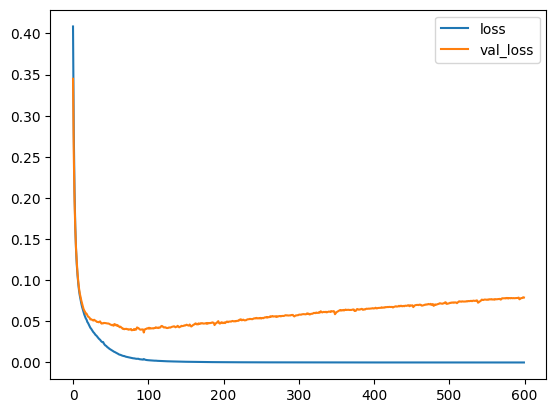

In [18]:
losses = pd.DataFrame(model.history.history)
losses.plot()

<font size=4> <div dir=rtl>
همانطور که در نمودار مشاهده میگردد در مراحل انتهایی ایتریشن ترین کردن خطا نزدیک به صفر شده اما خطای تست با فاصله از آموزش قرار دارد که نشان دهنده اورفیتینگ میباشد.



## 6-2-Second Model
<font size=4> <div dir=rtl>
 در این مدل از early stop  استفاده میشود تا از اورفیتیگ که در نمودار بالا مشاهده میگردد جلوگیری شود


Epoch 1/600
15/15 [==============================] - 2s 14ms/step - loss: 0.5632 - val_loss: 0.4538
Epoch 2/600
15/15 [==============================] - 0s 5ms/step - loss: 0.3826 - val_loss: 0.3257
Epoch 3/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2765 - val_loss: 0.2495
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2126 - val_loss: 0.1997
Epoch 5/600
15/15 [==============================] - 0s 6ms/step - loss: 0.1703 - val_loss: 0.1688
Epoch 6/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1448 - val_loss: 0.1454
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1269 - val_loss: 0.1304
Epoch 8/600
15/15 [==============================] - 0s 6ms/step - loss: 0.1134 - val_loss: 0.1173
Epoch 9/600
15/15 [==============================] - 0s 5ms/step - loss: 0.1035 - val_loss: 0.1072
Epoch 10/600
15/15 [==============================] - 0s 6ms/step - loss: 0.0953 - val_loss: 0.0987
Epoch 11

<Axes: >

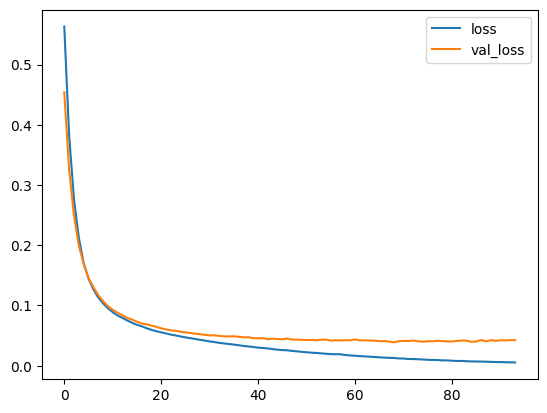

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

model_v2 = Sequential()
model_v2.add(Dense(30, activation='relu'))
model_v2.add(Dense(15, activation='relu'))
model_v2.add(Dense(1, activation='sigmoid'))

model_v2.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_v2.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
            callbacks = [early_stop])

model_v2_loss = pd.DataFrame(model_v2.history.history)
model_v2_loss.plot()

<font size=4> <div dir=rtl>
با استفاده ازاین متد مشاهده گردید که خطای اورفیتینگ کمتر شده است.


## 6-3-Finding Best Learning Rate
<font size=4> <div dir=rtl>
 در این قسمت مقادیر متفاوت را تست میکنیم و با ترسیم نمودار ها مقایسه را انجام میدهیم و ان که بهترین نتیجه را در پی دارد به عنوان مدل نهایی انتخاب میکنیم.

Epoch 88: early stopping


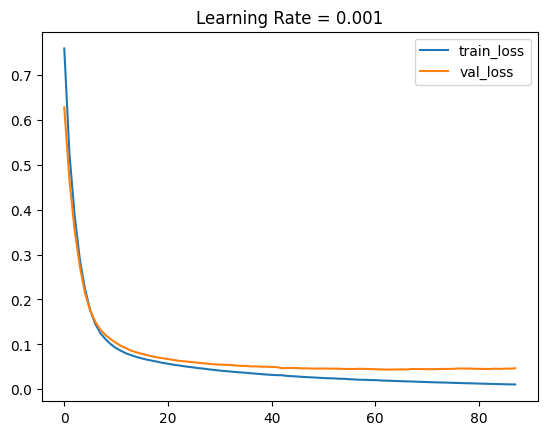

Epoch 52: early stopping


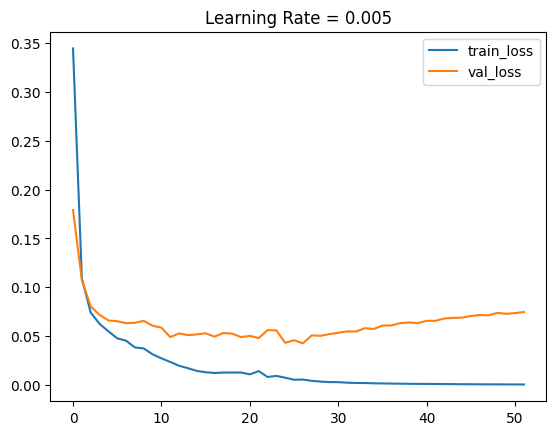

Epoch 42: early stopping


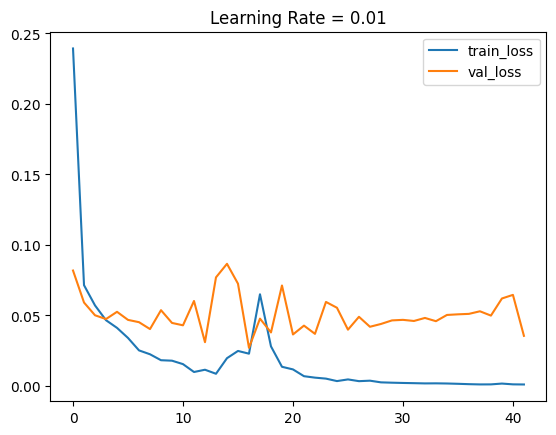

Epoch 38: early stopping


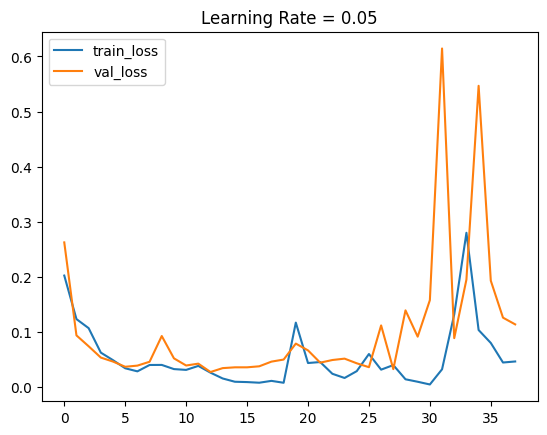

Epoch 68: early stopping


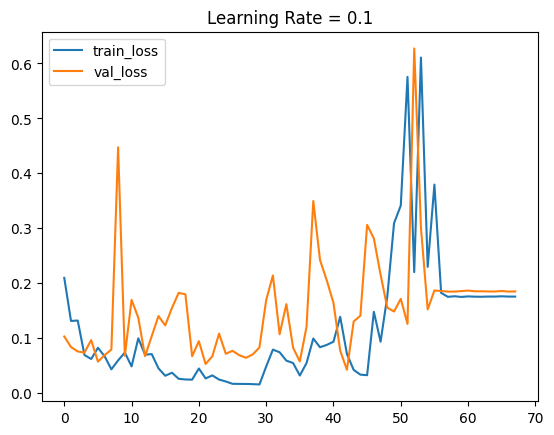

In [20]:
import matplotlib.pyplot as plt

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]

for lr in learning_rates:
    model_v2 = Sequential()
    model_v2.add(Dense(30, activation='relu'))
    model_v2.add(Dense(15, activation='relu'))
    model_v2.add(Dense(1, activation='sigmoid'))

    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model_v2.compile(loss='binary_crossentropy', optimizer=optimizer)

    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

    history = model_v2.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test),
                callbacks=[early_stop], verbose=0)

    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Learning Rate = {lr}')
    plt.legend()
    plt.show()

<font size=4> <div dir=rtl>
همانطور که در مقایسه نمودار ها مشاهده میگردد بهترین نمودار متعلق به اولین نمودار یعنی

 LR = 0.001

میباشد که مقدار دیفالت اولیه بود و همچنین کمترین  میزان خطا و کمترین میزان اورفیتینگ را همزمان داراست.

## 6-4-Finding Best Epoch
<font size=4> <div dir=rtl>
 در این مرحله epochs های مختلف از 50 تا 600 را امتحان میکنیم تا بهترین مقدار آن و بهینه ترین را بدست آوریم. نتیجه کار 5 تا نمودار است که با مقایسه آن ها بهینه ترین را انتخاب میکنیم.

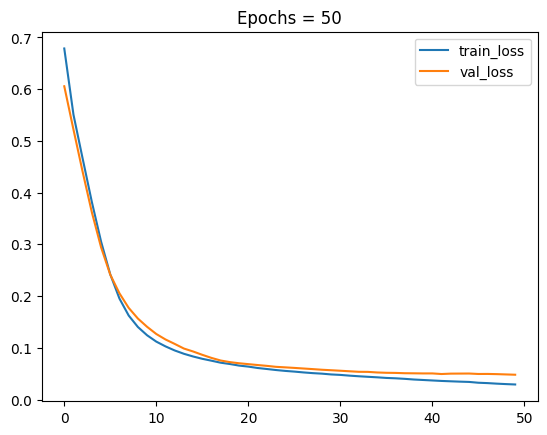

Epoch 84: early stopping


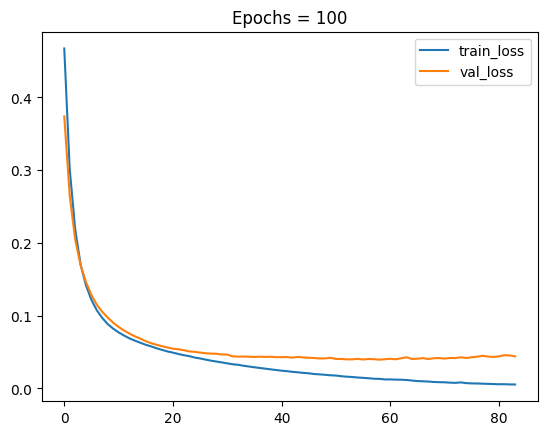

Epoch 97: early stopping


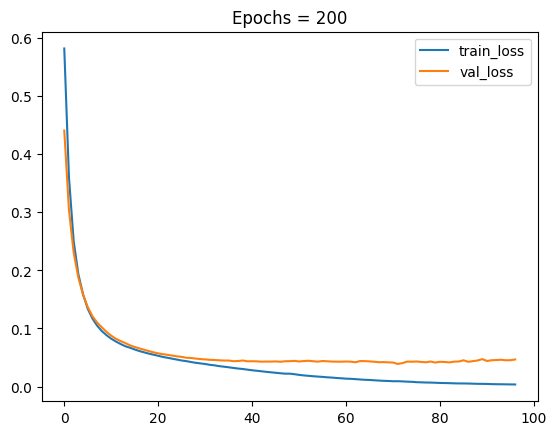

Epoch 78: early stopping


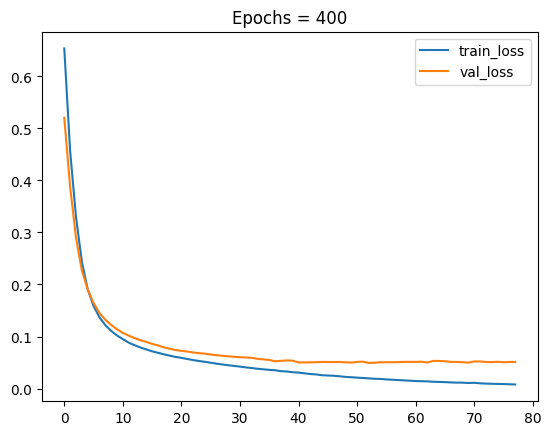

Epoch 88: early stopping


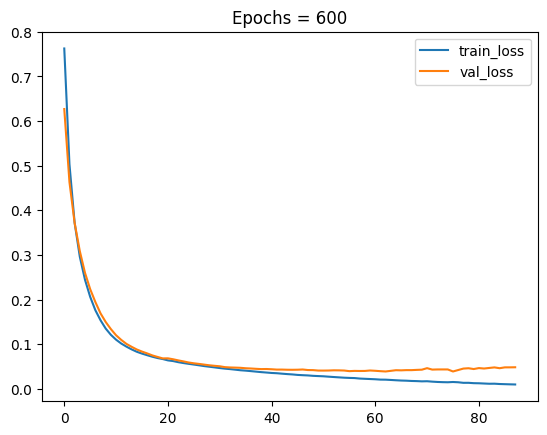

In [26]:
epochs_list = [50, 100, 200, 400, 600]

for num_epochs in epochs_list:
    model_v2 = Sequential()
    model_v2.add(Dense(30, activation='relu'))
    model_v2.add(Dense(15, activation='relu'))
    model_v2.add(Dense(1, activation='sigmoid'))

    model_v2.compile(loss='binary_crossentropy', optimizer='adam') #learning rate 0.001

    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

    history = model_v2.fit(x=X_train, y=y_train, epochs=num_epochs, validation_data=(X_test, y_test),
                callbacks=[early_stop], verbose=0)

    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(f'Epochs = {num_epochs}')
    plt.legend()
    plt.show()

<font size=4> <div dir=rtl>
بهترین میزان برای epochs ظاهرا از روی نمودار ها مقدار 50 میباشد.

## 6-5-Results and Evaluate


<font size=4> <div dir=rtl>
*  توجه شود که در این پروژه 5 مقدار برای learning rate  و 5 مقدار برای epochs در نظر گرفته شد و در مجموع 10 مدل ترین شد.
*   مقدار بهینه $ \alpha = 0.001 $  و $ epochs = 50 $ معین شد.
* در ساخت این مدل ها برای جلوگیری از عدم اورفیت (overfitting) از متد ***early stop***  استفاده شده است و از متد ***validation split***  استفاده نشد.



In [27]:
model_o = Sequential()
model_o.add(Dense(30, activation='relu'))
model_o.add(Dense(15, activation='relu'))
model_o.add(Dense(1, activation='sigmoid'))

model_o.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model_o.fit(x=X_train, y=y_train, epochs=50, validation_data=(X_test, y_test),
            callbacks = [early_stop], verbose=0)

<Axes: >

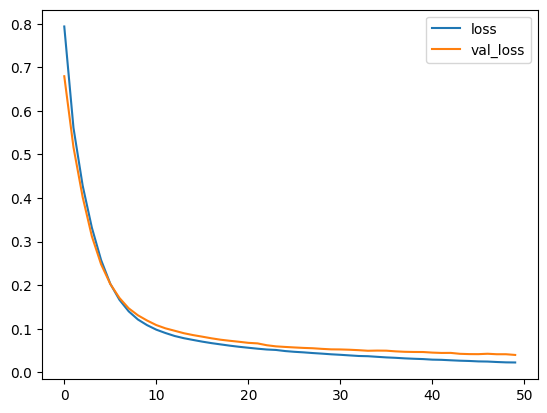

In [29]:
model_o_loss = pd.DataFrame(model_o.history.history)
model_o_loss.plot()

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        70
           1       1.00      0.98      0.99        44

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



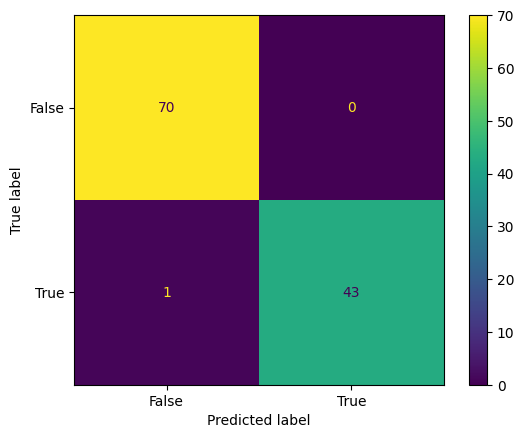

In [39]:
from sklearn import metrics
predict = (model_o.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, predict))

confusion_matrix_3 = metrics.confusion_matrix(y_test, predict)
cm_display_3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_3, display_labels = [False, True])
print("=" * 80)
cm_display_3.plot()
plt.show()

<font size=4> <div dir=rtl>
در این ارزیابی threshold = 0.5  در نظر گرفته شد.


<font size=4> <div dir=rtl>
در نهایت با مشاهده ارزیابی و ماتریس اشفتگی مشاهده میشود که این مدل به درستی کار کرده است و علاوه بر خطای کم بر روی داده آموزش ، خطای کمی روی داده آزمایش داشته است و با دقت 99 درصد و همچنین f-1 score  99 نماینگر این است که مدل خوب با هایپرپارامتر خوب  ساخته شده است.